In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [17]:
data = pd.read_csv("train.csv")

In [18]:
# 1. Drop Loan_ID (not useful for prediction)
data = data.drop(columns=["Loan_ID"])

In [19]:
# 2. Handle missing values
for col in data.columns:
    if data[col].dtype == "object":  # categorical
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:  # numerical
        data[col].fillna(data[col].median(), inplace=True)

C:\Users\sruja\AppData\Local\Temp\ipykernel_26620\3861372960.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\sruja\AppData\Local\Temp\ipykernel_26620\3861372960.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [20]:
# 3. Encode categorical variables
label_enc = LabelEncoder()
for col in data.select_dtypes(include=["object"]).columns:
    data[col] = label_enc.fit_transform(data[col])

In [21]:
# Features (X) & Target (y)
X = data.drop("Loan_Status", axis=1)
y = data["Loan_Status"]


In [22]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# 5. Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# 6. Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
# Predictions
y_pred = model.predict(X_test)



In [27]:
# 7. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



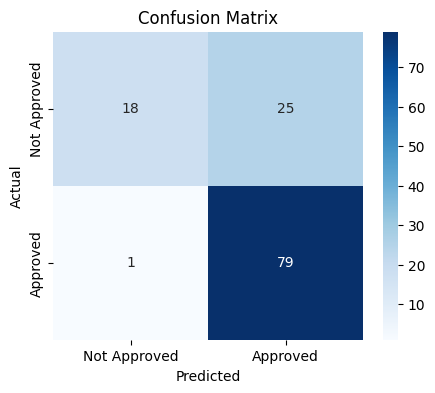

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Approved","Approved"], yticklabels=["Not Approved","Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()